## ¿Diagnóstico Benigno o Maligno?. Variable Objetivo a predecir: Diagnosis

Podemos encontrar el dataset en la siguiente ruta: 
    
    https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

### Prepare Problem (2 points)

#### Cargamos las librerías

In [1]:
import numpy as np
import pandas as pd
import time

# plotting libraries
import matplotlib.pyplot as plt
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns


# machine learning 
from feature_selector import FeatureSelector
from sklearn.model_selection import train_test_split


#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score


from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Cargamos el dataset y visualizamos las 5 primeras filas

In [2]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\data\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

data.head()              ### Visualizamos las 5 primeras líneas del dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Summarize Data (2points)

#### a) Describe statistics

In [3]:
data.shape


(569, 32)

El dataset con 569 filas and 32 columnas

Ahora sacaremos algunos estadísticos del dataset (cuartiles, media, mínimo, máximo...). Podemos ver, por ejemplo, que el máximo de la variable radius_mean es 28.110000 y el mínimo es 6.981000. Además su media es de 14.127292

In [4]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Estudiamos ahora la columna principal de nuestro dataset que es 'diagnosis'. Diagnosis es la variable que queremos predecir.
Como podemos ver, tiene dos valores únicos, que son B y M. El que más aparece es el B (Diagnóstico Benigno) con 357 apariciones, mientras que Maligno tiene 212 apariciones. Los datos están un poco desbalanceados, ya que hay más casos de Diagnóstico Benigno que de diagnóstico Maligno

In [5]:
# describe of main_category column
data['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [6]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
# Miramos ahora el tipo de datos que tenemos en cada una de las columnas. Como vemos, todas las variables son numéricas
# con la excepción de la variable Target, que toma los valores de B y M.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [9]:
# Miramos el nombre de las columnas del dataset

data.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Estudiamos el sesgo de cada una de las variables. Cuanto más próximos estén los valores a 0, menos sesgo tienen.

Un skew positivo es cuando la cola en el lado derecho de la distribución es más larga o más gorda. 
En el caso de skew positivo la media y la mediana serán mayores que la moda.

Un skew negativo es cuando la cola del lado izquierdo de la distribución es más larga o más gruesa que 
la cola del lado derecho. La media y la mediana serán menores que la moda.

In [10]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

Estudiamos la curtosis de las diferentes variables. La curtosis determina el grado de concentración que presentan los 
valores de una variable alrededor de la zona central de la distribución de frecuencias.

Si la curtosis es mayor a 3, existe una concentración mayor de lo normal de los valores entorno a la media (leptocúrtica).
Si la curtosis es 3, existe una concentración normal de los valores entorno a la media (Mesocúrtica).
Si la curtosis es menor a 3, existe una concentración menor de lo normal de los valores entorno a la media (Platicúrtica).

In [11]:
data.kurtosis()

radius_mean                 0.845522
texture_mean                0.758319
perimeter_mean              0.972214
area_mean                   3.652303
smoothness_mean             0.855975
compactness_mean            1.650130
concavity_mean              1.998638
concave points_mean         1.066556
symmetry_mean               1.287933
fractal_dimension_mean      3.005892
radius_se                  17.686726
texture_se                  5.349169
perimeter_se               21.401905
area_se                    49.209077
smoothness_se              10.469840
compactness_se              5.106252
concavity_se               48.861395
concave points_se           5.126302
symmetry_se                 7.896130
fractal_dimension_se       26.280847
radius_worst                0.944090
texture_worst               0.224302
perimeter_worst             1.070150
area_worst                  4.396395
smoothness_worst            0.517825
compactness_worst           3.039288
concavity_worst             1.615253
c

#### b) Data Visualitations

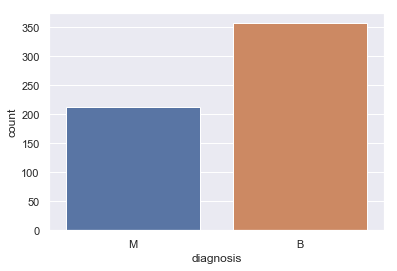

In [12]:
# Gráfico de frecuencias según el diagnóstico. Como podemos ver en el gráfico, hay más casos Benignos que Malignos.
sns.set(style="darkgrid")
sns.countplot(data['diagnosis'],label="Count")

A continuación vamos a dibujar los diagramas de cajas. Separando entre las variables mean, worst y se.
Además de los diagramas de cajas, he dibujado los diagramas de violín. La función es básicamente la misma pero es más visual
ya que al estar separado entre Benigno y Maligno, con el diagrama de violin se visualiza en una única figura. Otras de las diferencias es que en el diagrama de violin no podemos ver los outliers,
mientras que en el diagrama de caja se pueden visualizar.

Si nos fijamos en el diagrama de cajas, cuando la distancia entre la mediana y los cuartiles es aproximadamente la misma, nos hace pensar que la distribución de los datos es más o menos simétrica.

Cuando la media es mayor a la mediana, la distribución es asimétrica con cola a la derecha (sesgada a la derecha). Si la media es menor a la mediana, la distribución es asimétrica con cola a la izquierda (sesgada a la izquierda)

Procedemos a dibujar el diagrama de cajas para las variables mean.

Como podemos ver, la mediana de la variable radius_mean es muy diferente en Maligno y en Benigno, lo que indica que es una buena variable para clasificar. Lo mismo ocurre con concavity_mean y con concave point_mean aunque no las podremos meter todas en el modelo ya que guardan una gran correlación entre sí.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

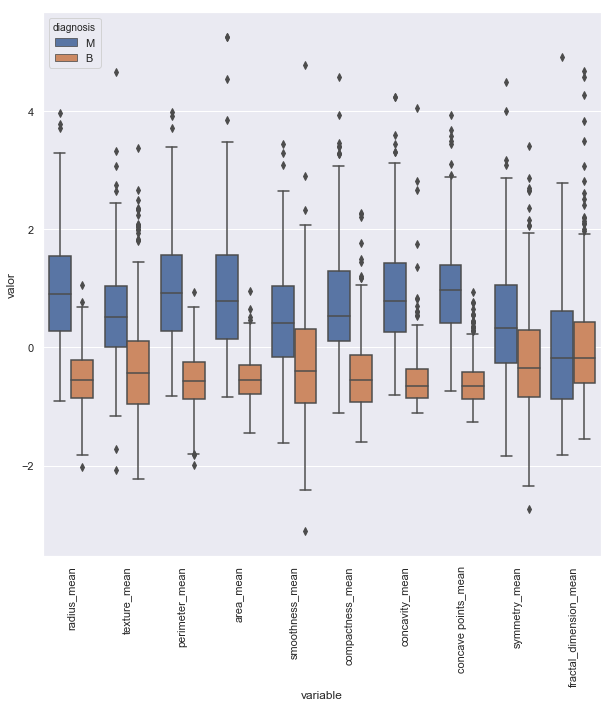

In [13]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

diagnostico=data.diagnosis
data= data.drop(['Unnamed: 32', 'diagnosis'], axis=1)
data_estandarizado = (data - data.mean()) / (data.std())          # En este paso estandarizamos. Hacemos esto porque si no, al
# dibujar las variables, al tener cada un rango, no se podría visualizar en el mismo plot
data = pd.concat([diagnostico,data_estandarizado.iloc[:,0:10]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="variable",
                    value_name='valor')

plt.figure(figsize=(10,10))
sns.boxplot(x = "variable", y = "valor",hue="diagnosis",data= data)
plt.xticks(rotation=90)

Procedemos ahora a dibujar el diagrama de violín para las variables mean:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

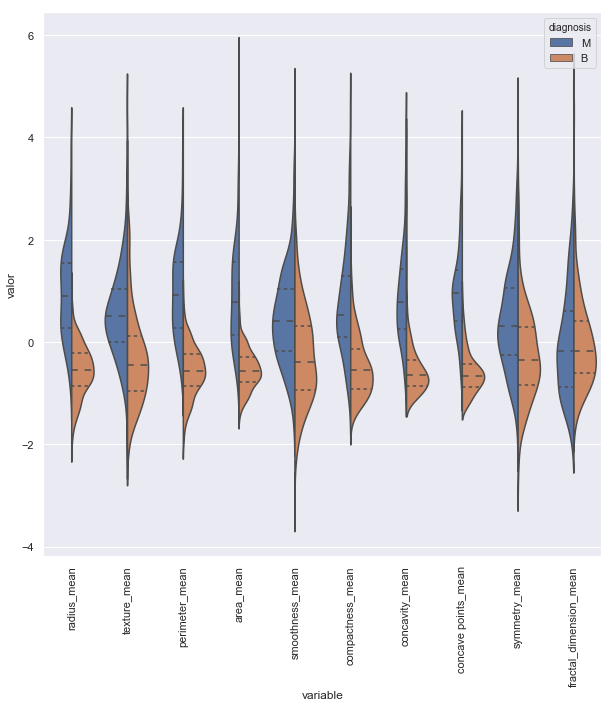

In [14]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

diagnostico=data.diagnosis
data= data.drop(['Unnamed: 32', 'diagnosis'], axis=1)
data_estandarizado = (data - data.mean()) / (data.std())          # Estandarizamos
data = pd.concat([diagnostico,data_estandarizado.iloc[:,0:10]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="variable",
                    value_name='valor')

plt.figure(figsize=(10,10))
sns.violinplot(x = "variable", y = "valor", split=True,hue="diagnosis",data= data, inner="quart")
plt.xticks(rotation=90)




Realizamos el diagrama de cajas para las variables se.

Como podemos ver en el diagrama de cajas, estas variables no son muy buenas para clasificación ya que sus valores son muy similares entre Benigno y Maligno.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

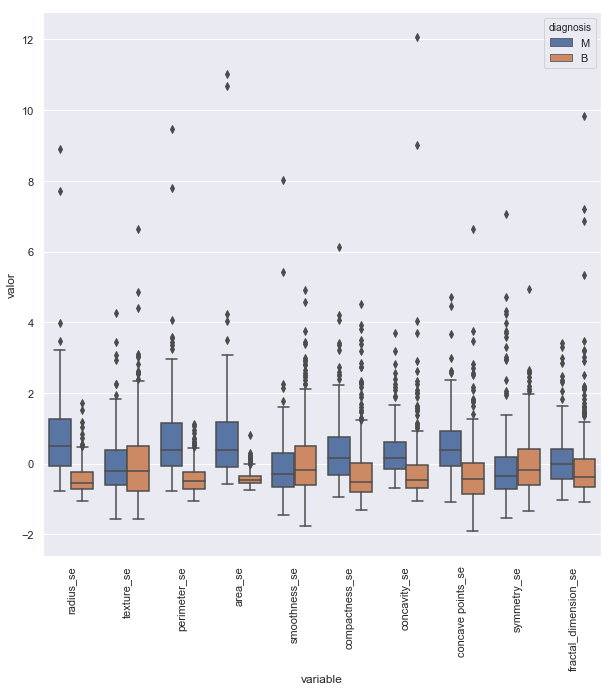

In [15]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

diagnostico=data.diagnosis
data= data.drop(['Unnamed: 32', 'diagnosis'], axis=1)
data_estandarizado = (data - data.mean()) / (data.std())          # Estandarizamos
data = pd.concat([diagnostico,data_estandarizado.iloc[:,10:20]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="variable",
                    value_name='valor')

plt.figure(figsize=(10,10))
sns.boxplot(x = "variable", y = "valor",hue="diagnosis",data= data)
plt.xticks(rotation=90)


Realizamos el diagrama de violín para las variables se:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

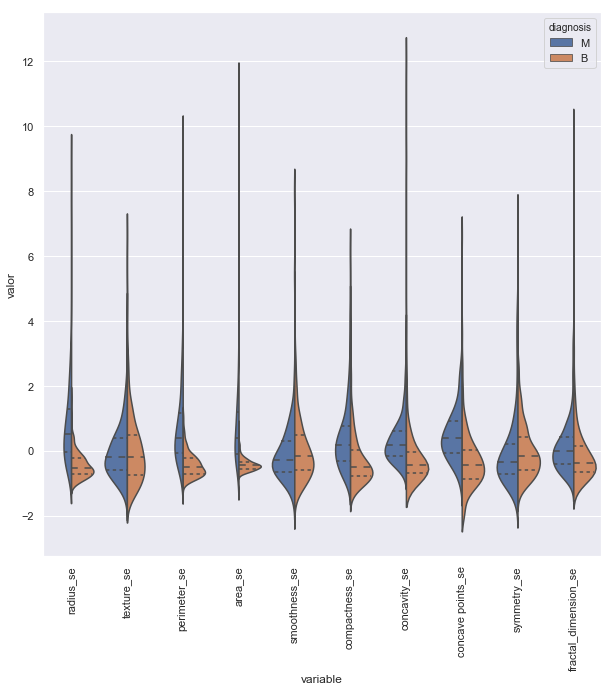

In [16]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

diagnostico=data.diagnosis
data= data.drop(['Unnamed: 32', 'diagnosis'], axis=1)
data_estandarizado = (data - data.mean()) / (data.std())          # Estandarizamos
data = pd.concat([diagnostico,data_estandarizado.iloc[:,10:20]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="variable",
                    value_name='valor')

plt.figure(figsize=(10,10))
sns.violinplot(x = "variable", y = "valor", split=True,hue="diagnosis",data= data, inner="quart")
plt.xticks(rotation=90)




Dibujamos el diagrama de cajas para las variables worst.

Como podemos ver, la variable concave points_worst diferencia muy bien los datos entre Benigno y Maligno, por lo que sería una muy buena variable para clasificación.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

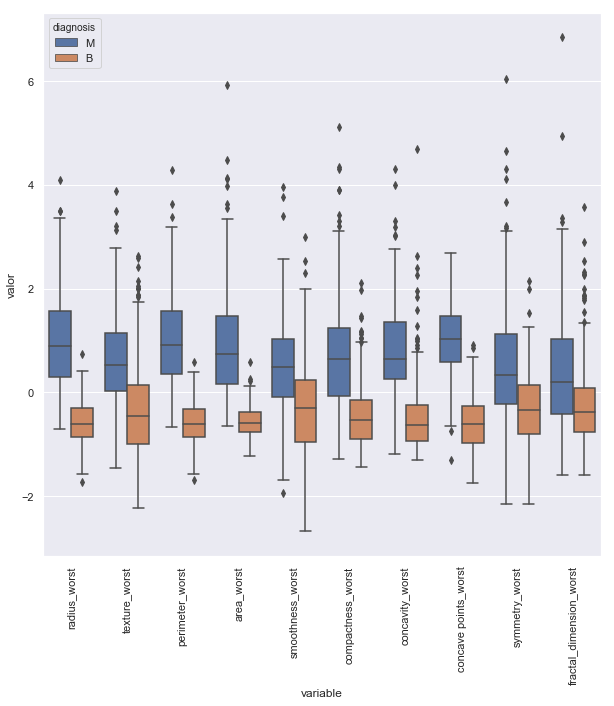

In [17]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

diagnostico=data.diagnosis
data= data.drop(['Unnamed: 32', 'diagnosis'], axis=1)
data_estandarizado = (data - data.mean()) / (data.std())          # Estandarizamos
data = pd.concat([diagnostico,data_estandarizado.iloc[:,20:31]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="variable",
                    value_name='valor')

plt.figure(figsize=(10,10))
sns.boxplot(x = "variable", y = "valor",hue="diagnosis",data= data)
plt.xticks(rotation=90)


Dibujamos el diagrama de violín para las variables worst

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

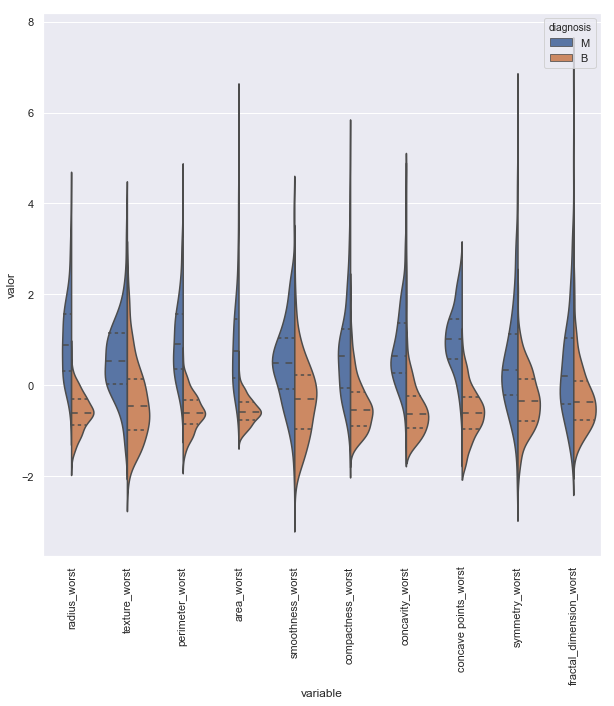

In [18]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

diagnostico=data.diagnosis
data= data.drop(['Unnamed: 32', 'diagnosis'], axis=1)
data_estandarizado = (data - data.mean()) / (data.std())          # Estandarizamos
data = pd.concat([diagnostico,data_estandarizado.iloc[:,20:31]],axis=1)

data = pd.melt(data,id_vars="diagnosis",
                    var_name="variable",
                    value_name='valor')

plt.figure(figsize=(10,10))
sns.violinplot(x = "variable", y = "valor", split=True,hue="diagnosis",data= data, inner="quart")
plt.xticks(rotation=90)


Fractal_dimension_worst y symmetry_worst tienen unas medianas similares para Benigno y
maligno por lo que no es muy recomendable usarlas para clasificación

Procedemos a realizar los histogramas de cada una de las variables para ver las frecuencias de cada uno de los valores. 
Como anteriormente, separamos las variables en mean, se y worst para una mejor visualización.

Las barras con más pico indican los valores más comunes que toma la variable. En los histogramas se pueden visualizar también valores atípicos, aunque de forma menos visual que en el diagrama de cajas.

Podemos ver que la variable texture, smooth y symmetry se asemejan más a una distribución gaussiana. 

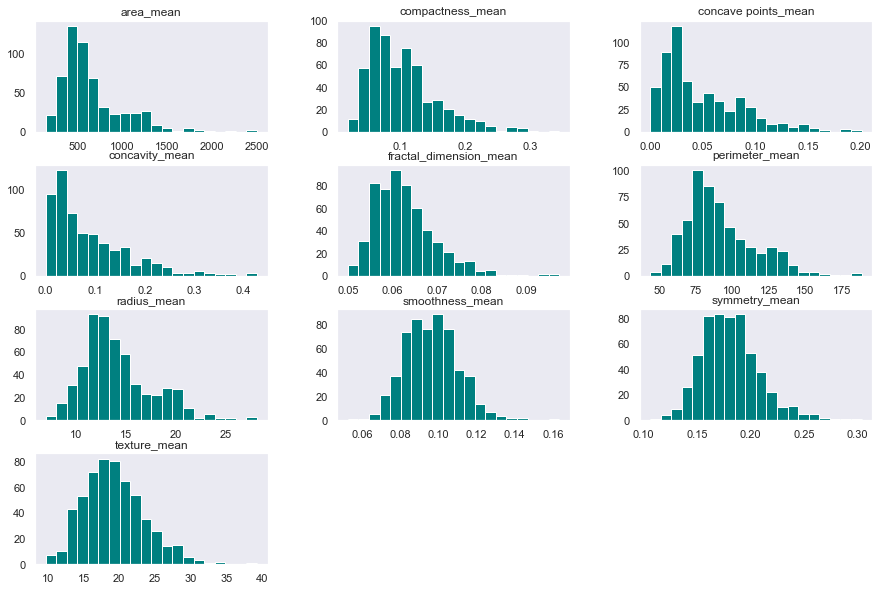

In [19]:
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

data_mean=data.iloc[:,1:11]
data_se=data.iloc[:,11:21]
data_worst=data.iloc[:,21:31]

hist_mean=data_mean.hist(bins=20, figsize=(15, 10),grid=False, color='teal')


Visualizamos ahora los histogramas de las variables se. Como podemos ver, ninguna de ella parece tener una distribución 
gaussiana.

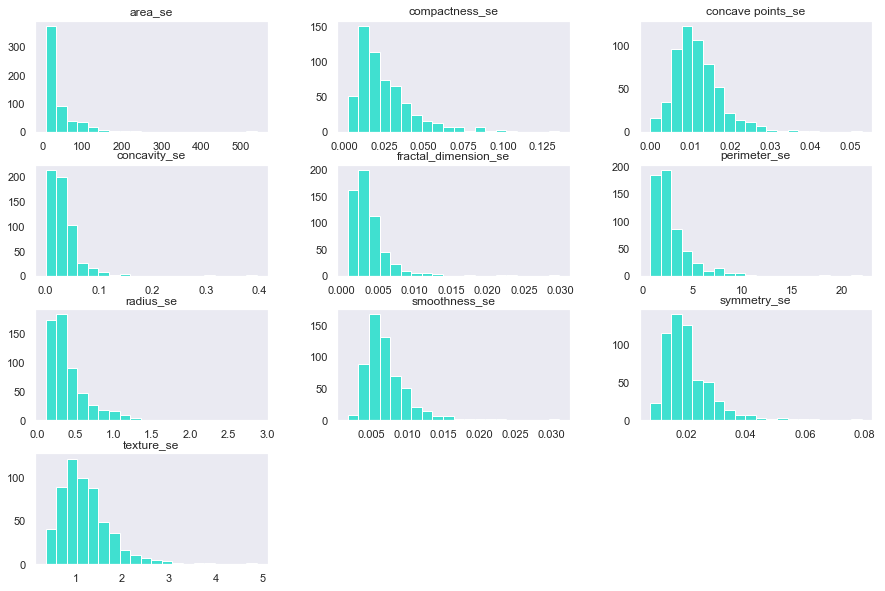

In [20]:
hist_se=data_se.hist(bins=20, figsize=(15, 10),grid=False, color='turquoise')


Visualizamos ahora los histogramas de las variables worst. Como podemos ver, la variable smoothness_worst
podría tener una distribución gaussiana. En cambio, el resto de las variables no se ven claramente como gaussianas. Las
variables area_worst podría tener una distribución exponencial

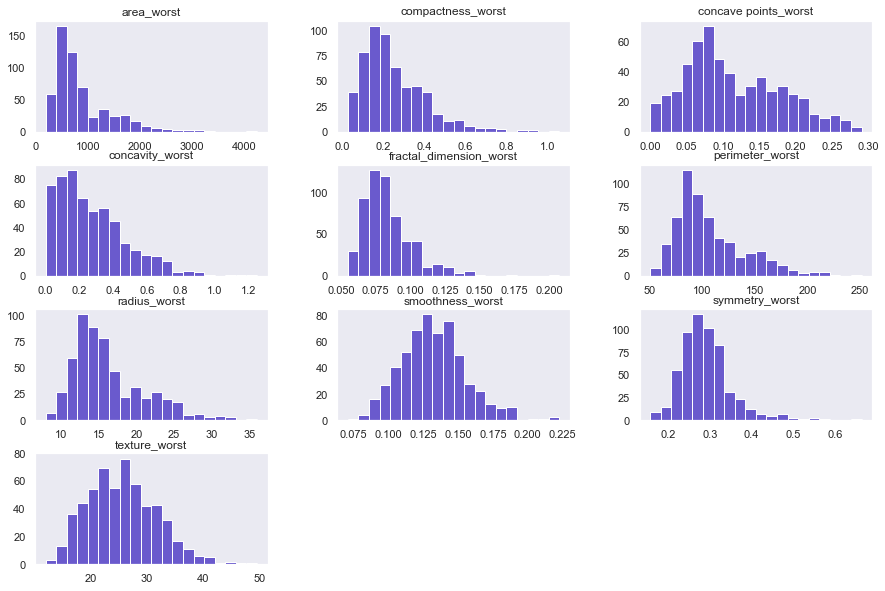

In [21]:
hist_worst=data_worst.hist(bins=20, figsize=(15, 10),grid=False, color='slateblue')


A continuación voy a dibujar los histogramas vistos anteriormente pero separando entre Benigno y Maligno. De esta forma
se pueden ver las diferencias de concentración de forma más visual. 

Si nos fijamos en las variables concave_points_worst y perimeter_worst vemos que hay mucha diferencia entre los valores que toman en Benigno y Maligno. Estas dos variables pueden ser muy buenas para clasificación, ya que diferencia bien la muestra Benigna de la muestra Maligna. Lo mismo ocurre con radius_mean. Aunque, antes de introducirlas al modelo, tenemos que analizar la correlación que existe entre ellas.

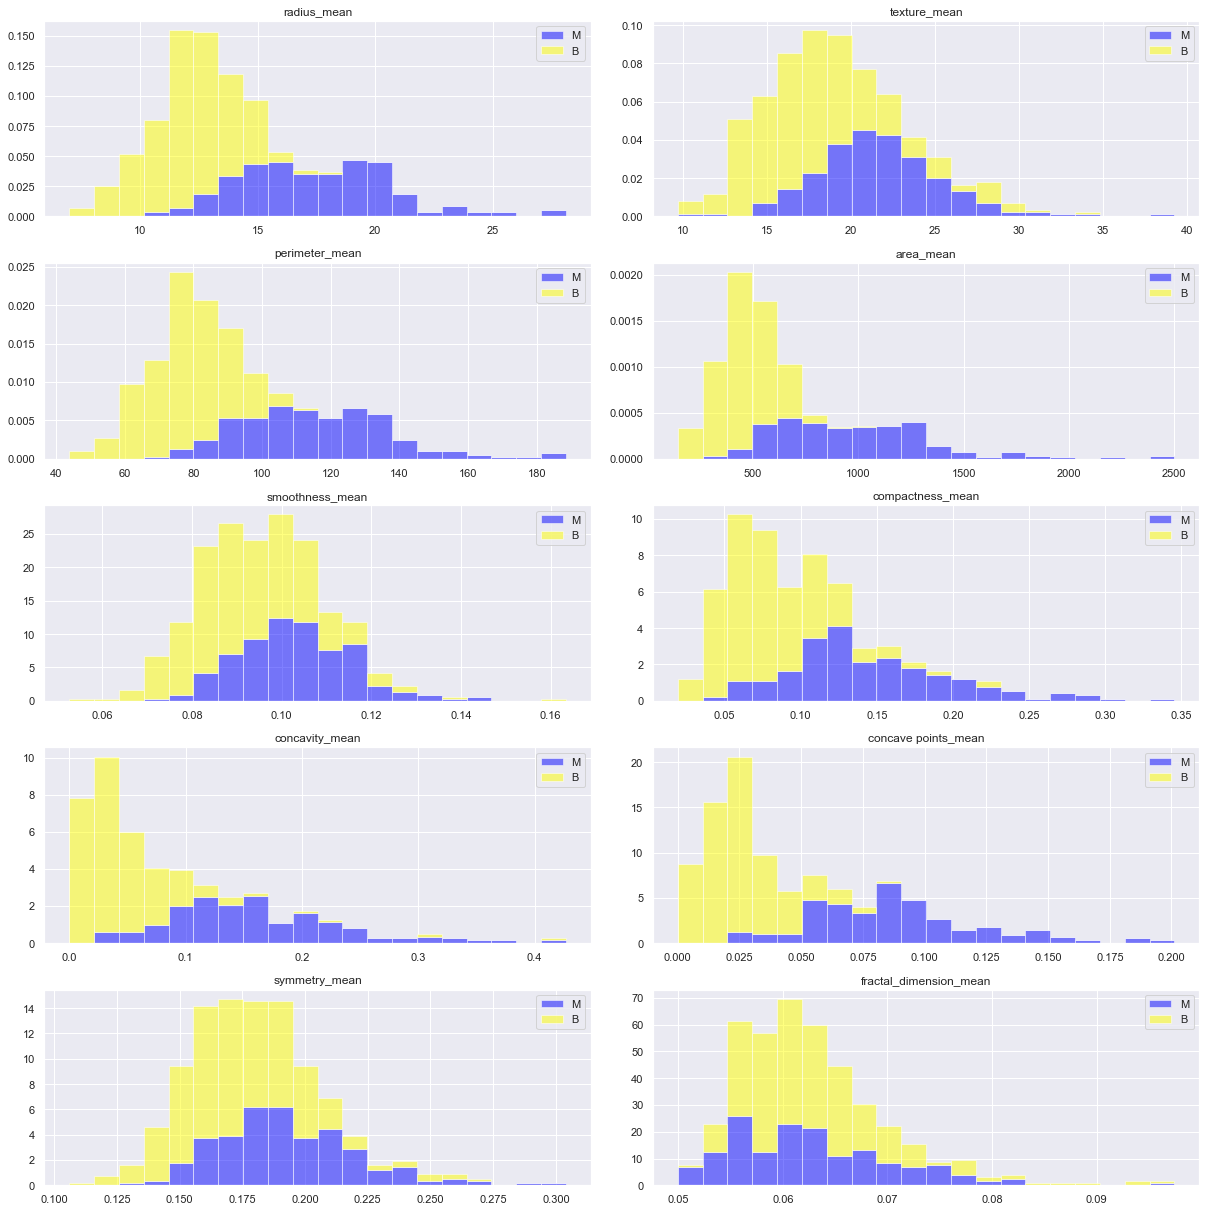

In [22]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0, parse_dates=True)
data.drop('Unnamed: 32',axis=1,inplace=True)

features_mean=list(data.columns[2:12])
# split dataframe into two based on diagnosis
Maligno=data[data['diagnosis'] =='M']
Benigno=data[data['diagnosis'] =='B']
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # subplots


#Stack the data
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(17,17))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/20
    ax.hist([Maligno[features_mean[idx]],Benigno[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['blue','yellow'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

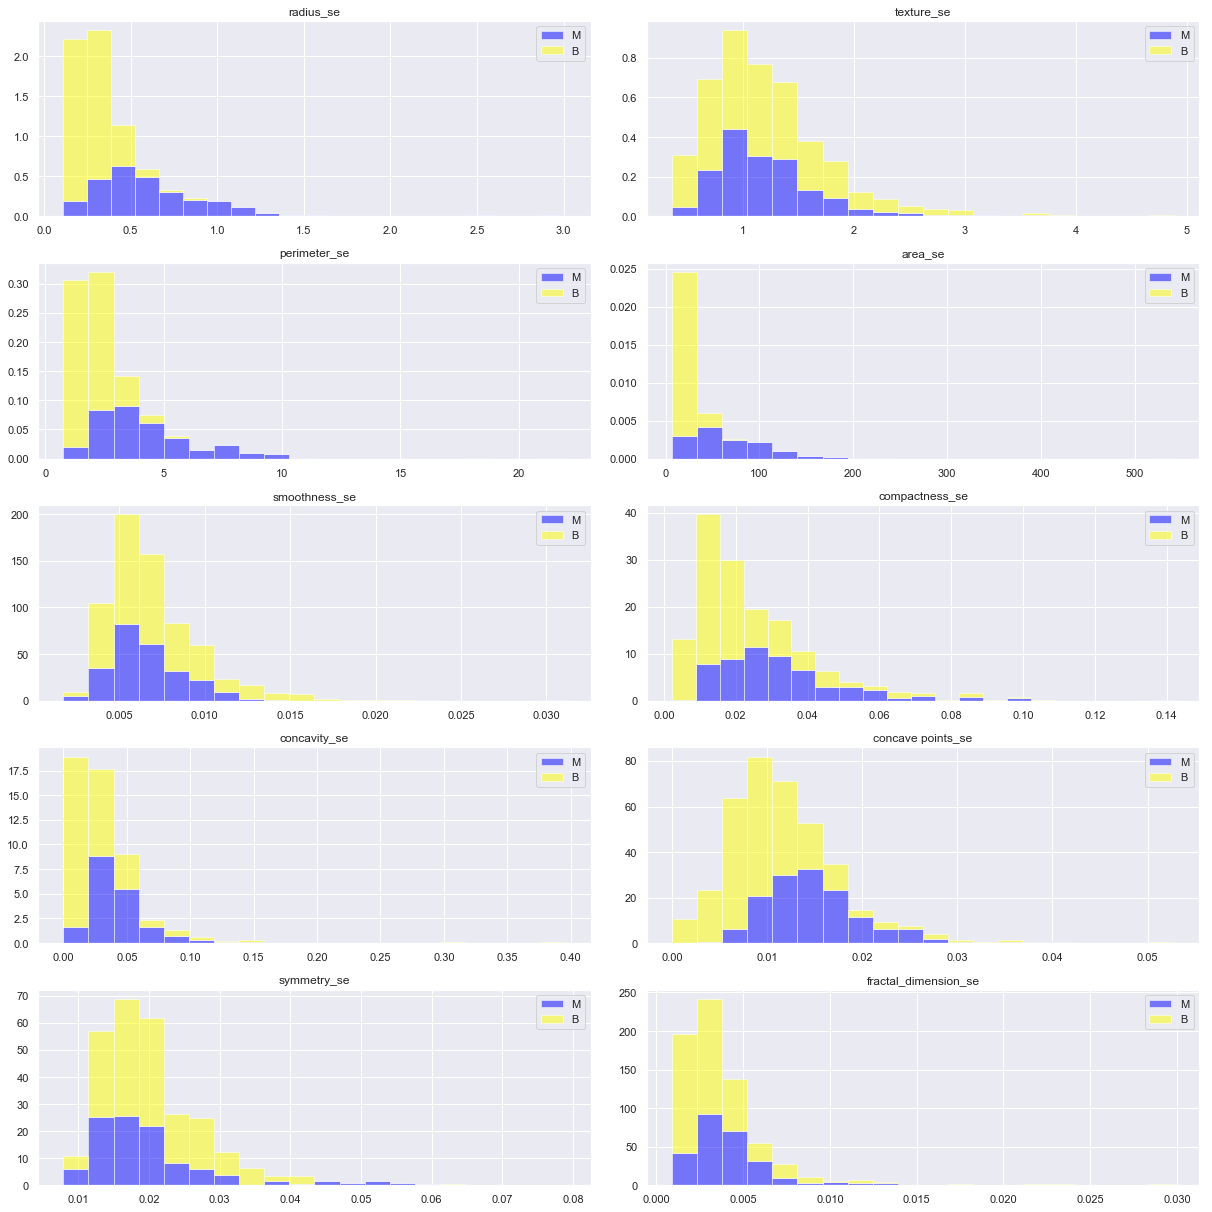

In [23]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0, parse_dates=True)
data.drop('Unnamed: 32',axis=1,inplace=True)


features_se=list(data.columns[12:22])
# split dataframe into two based on diagnosis
Maligno=data[data['diagnosis'] =='M']
Benigno=data[data['diagnosis'] =='B']
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # subplots


#Stack the data
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(17,17))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_se[idx]]) - min(data[features_se[idx]]))/20
    ax.hist([Maligno[features_se[idx]],Benigno[features_se[idx]]], bins=np.arange(min(data[features_se[idx]]), max(data[features_se[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['blue','yellow'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[idx])
plt.tight_layout()
plt.show()

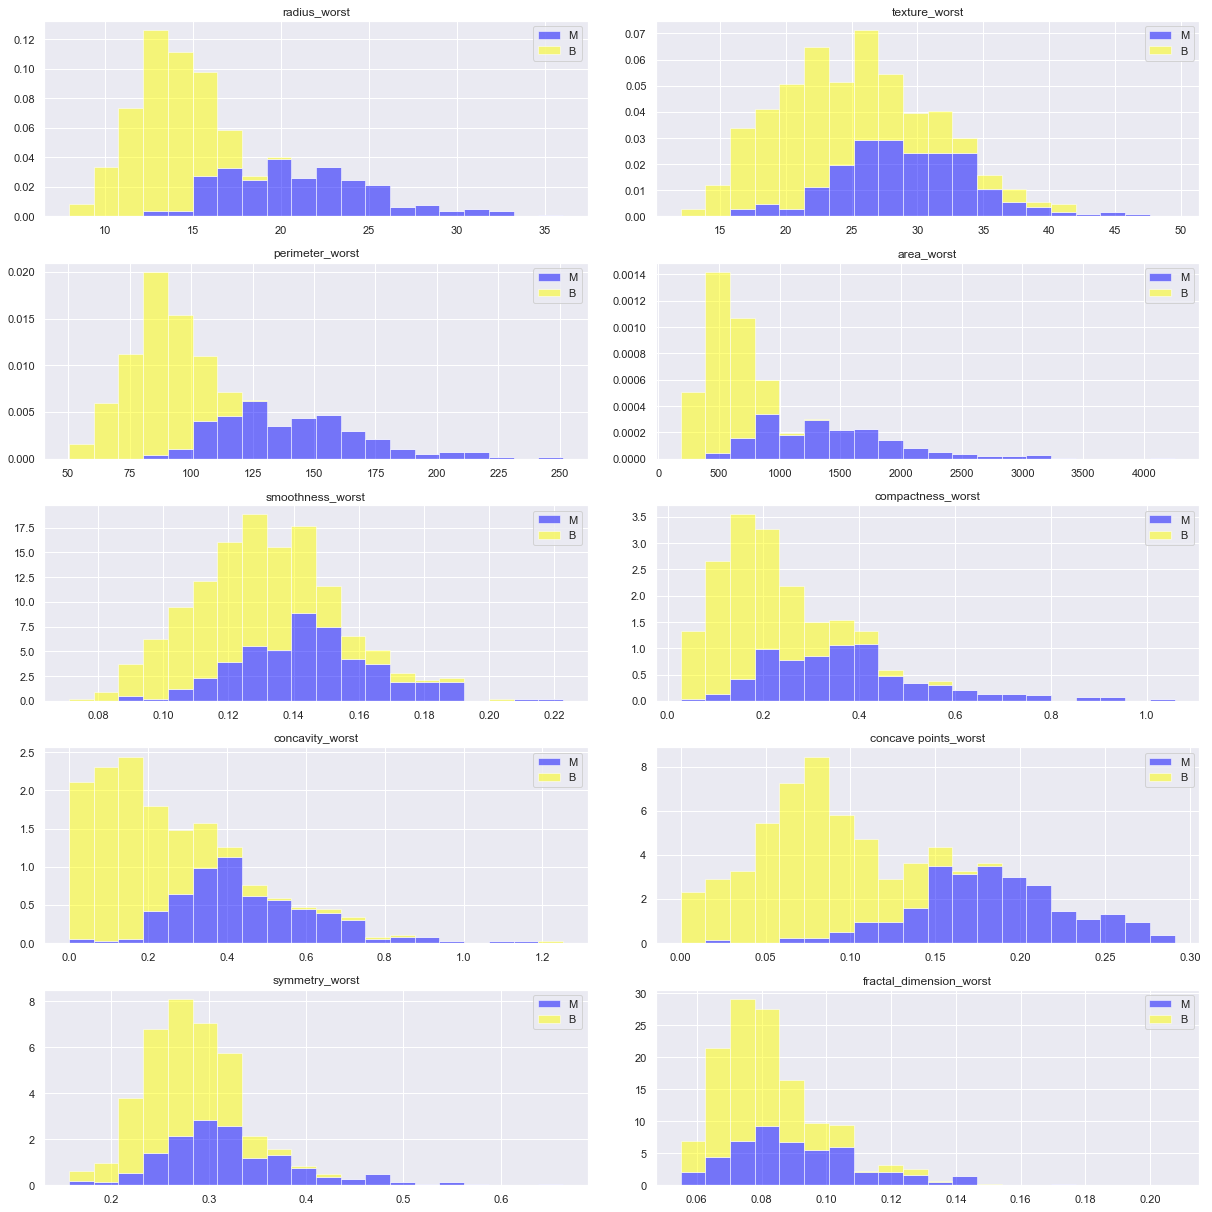

In [24]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0, parse_dates=True)
data.drop('Unnamed: 32',axis=1,inplace=True)


features_worst=list(data.columns[22:32])
# split dataframe into two based on diagnosis
Maligno=data[data['diagnosis'] =='M']
Benigno=data[data['diagnosis'] =='B']
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # subplots


#Stack the data
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(17,17))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_worst[idx]]) - min(data[features_worst[idx]]))/20
    ax.hist([Maligno[features_worst[idx]],Benigno[features_worst[idx]]], bins=np.arange(min(data[features_worst[idx]]), max(data[features_worst[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['blue','yellow'])
    ax.legend(loc='upper right')
    ax.set_title(features_worst[idx])
plt.tight_layout()
plt.show()

A continuación voy a dibujar el Stripplot. A través del Stripplot se ve de manera mucho más fácil y visual los valores tomados por cada una de las variables separados por la target, de esta forma, podemos ver la diferencia de valores tomados entre Benigno y Maligno de la variable en cuestión. 

Podemos ver, por ejemplo, que la variable fractal_dimension_mean, básicamente no diferencia los valores entre Benigno y Maligno, ya que toma valores muy parecidos o casi iguales, por lo que no es recomendable usarla en nuestro modelo, ya que no diferencia bien entre las dos categorías.

En cambio, la variable concave points_worst diferencia bastante bien entre Maligno y Benigno

<Figure size 432x288 with 0 Axes>

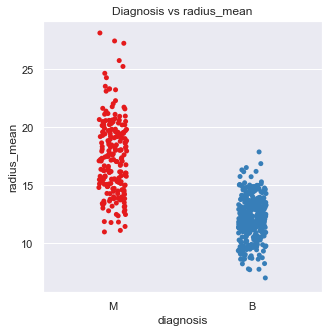

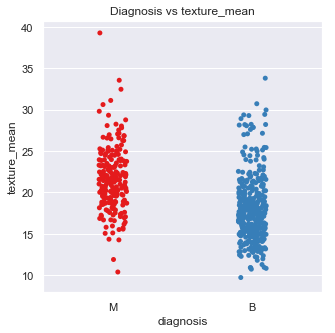

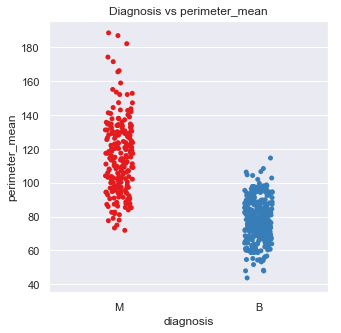

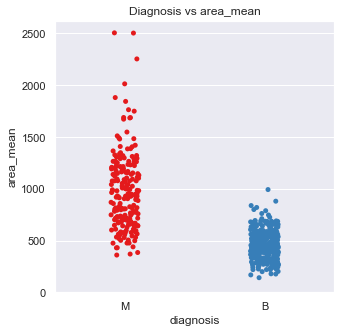

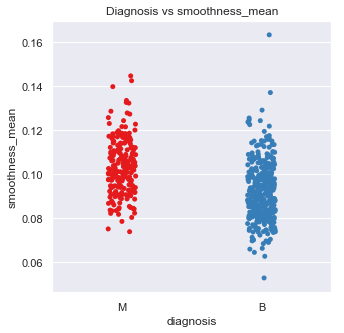

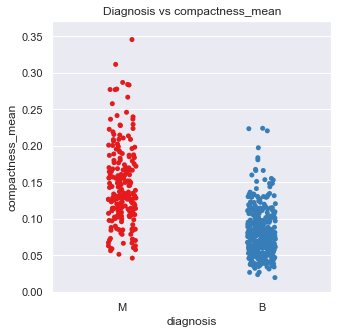

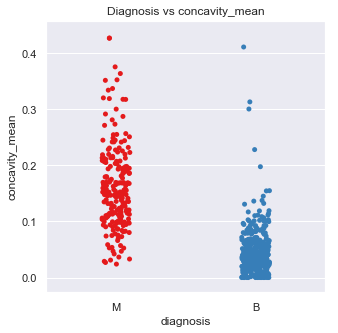

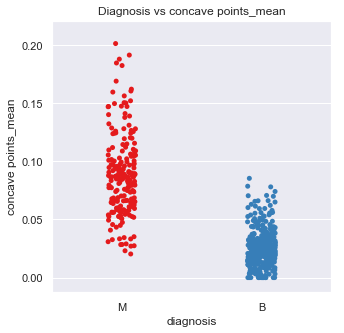

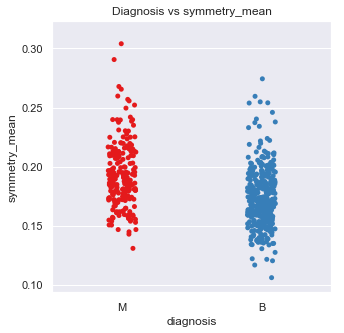

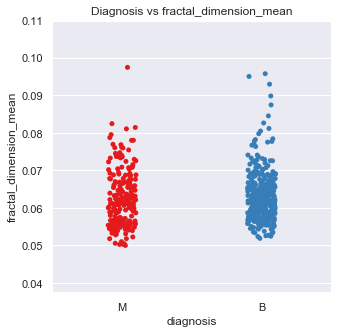

In [25]:
data_drop = data.drop('diagnosis',axis=1)
data_drop = data_drop[features_mean]
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(5,5))
    sns.stripplot(x='diagnosis', y= columns, data= data, jitter=True, palette = 'Set1');
    plt.title('Diagnosis vs ' + str(columns))

<Figure size 432x288 with 0 Axes>

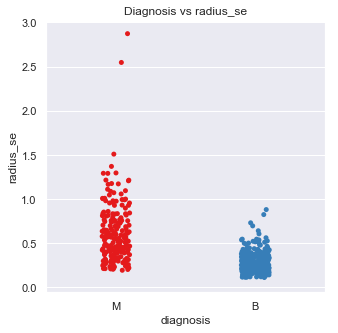

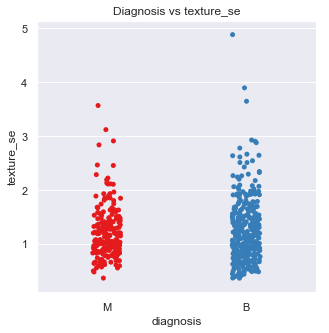

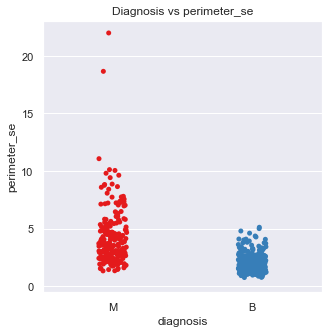

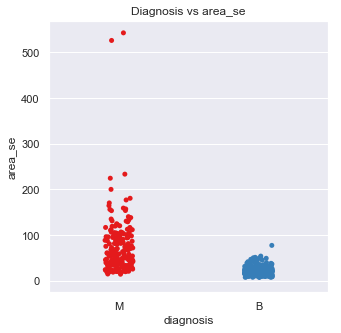

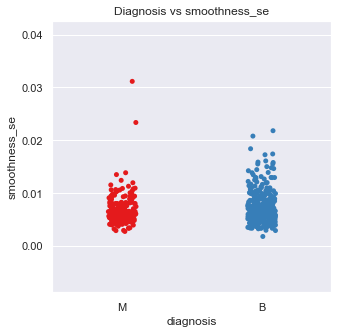

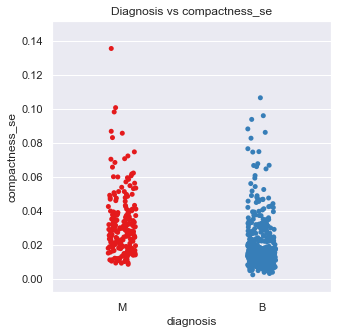

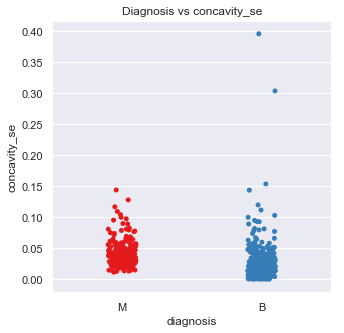

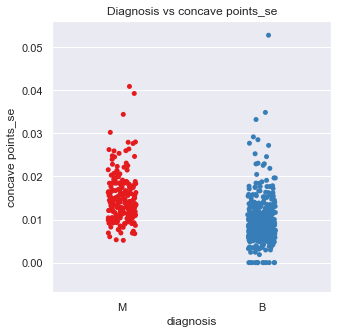

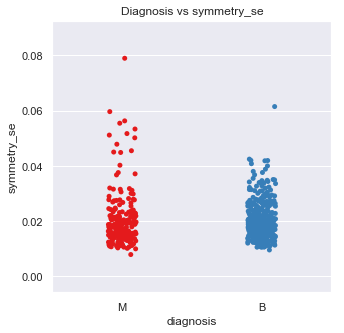

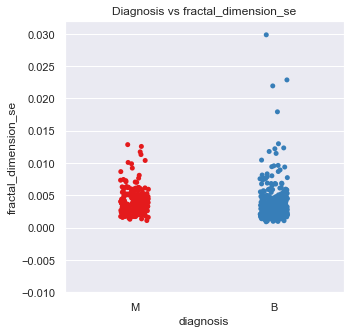

In [26]:
data_drop = data.drop('diagnosis',axis=1)
data_drop = data_drop[features_se]
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(5,5))
    sns.stripplot(x='diagnosis', y= columns, data= data, jitter=True, palette = 'Set1');
    plt.title('Diagnosis vs ' + str(columns))

<Figure size 432x288 with 0 Axes>

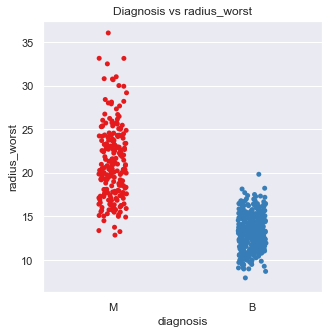

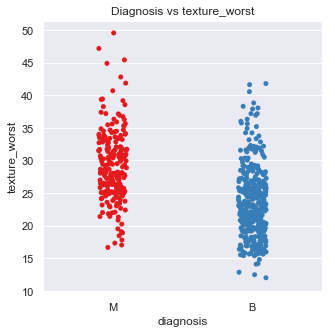

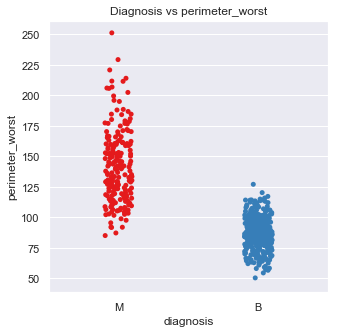

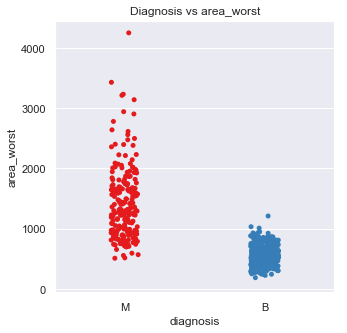

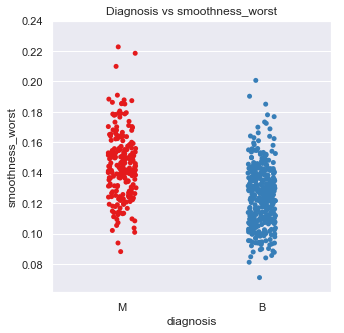

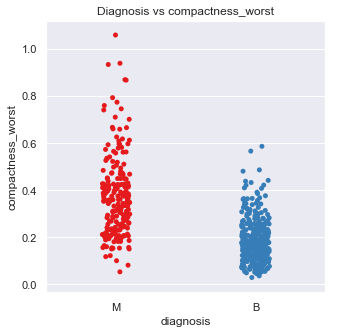

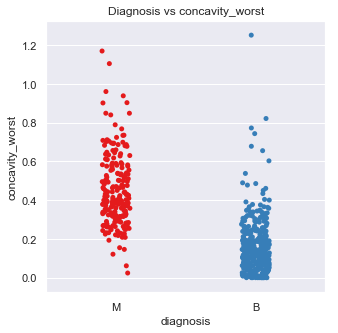

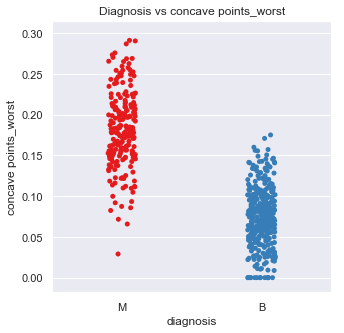

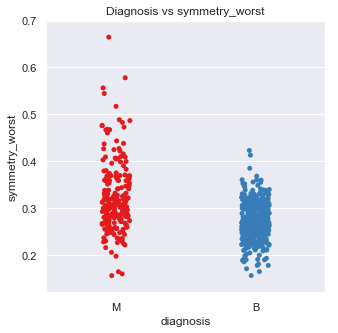

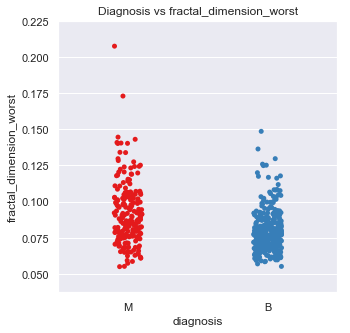

In [27]:
data_drop = data.drop('diagnosis',axis=1)
data_drop = data_drop[features_worst]
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(5,5))
    sns.stripplot(x='diagnosis', y= columns, data= data, jitter=True, palette = 'Set1');
    plt.title('Diagnosis vs ' + str(columns))

A continuación dibujo las funciones de densidad, muestran más o menos lo mismo que un histograma pero con mayor precisión. Además, se visualiza mejor que los histogramas ya que no se superponen

C:\Users\mixcr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



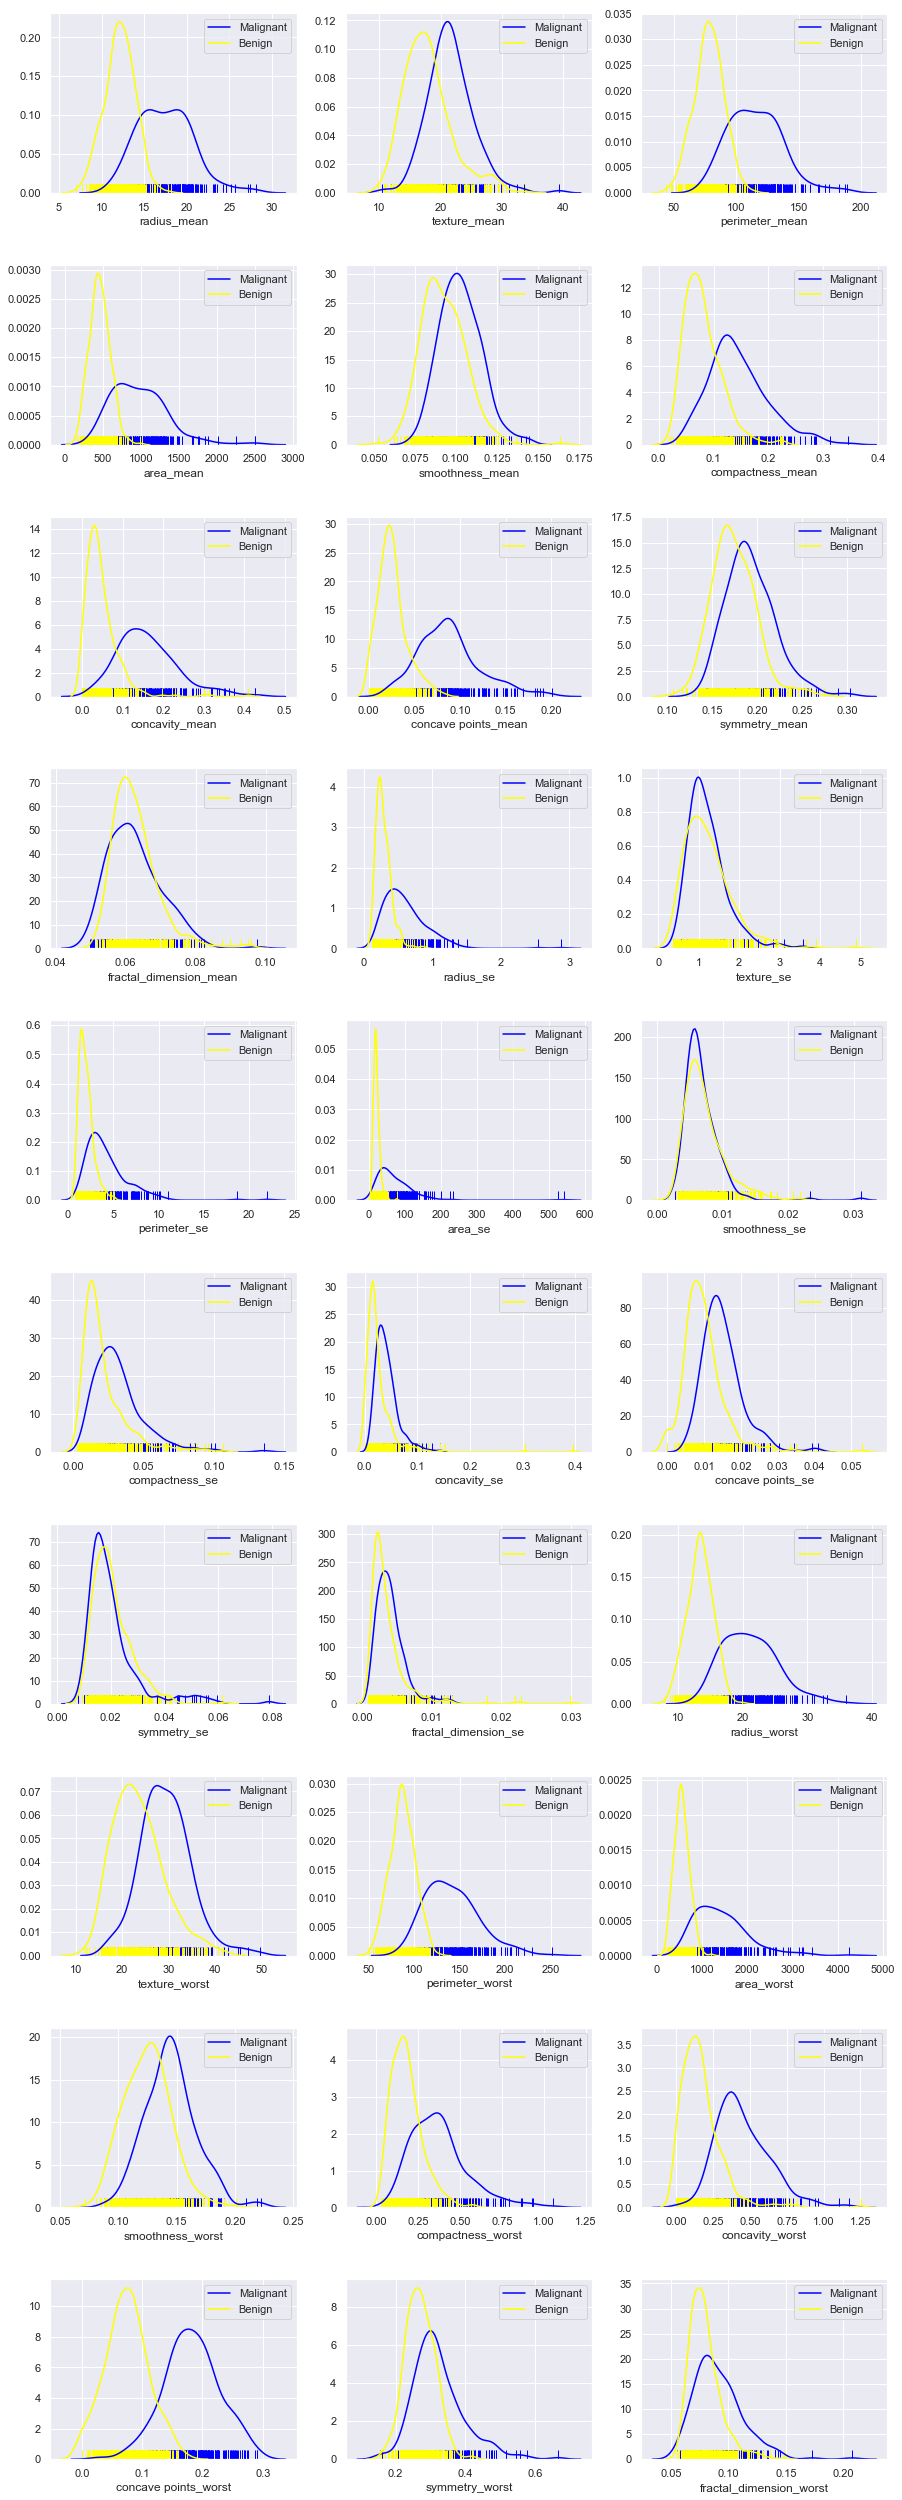

In [28]:
M=data.loc[data['diagnosis']=='M',:]
B=data.loc[data['diagnosis']=='B',:]

M=M.drop(['diagnosis', 'id'],axis=1)
B=B.drop(['diagnosis', 'id'],axis=1)

plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in M.columns:
    i+=1
    plt.subplot(10,3,i)
    sns.distplot(M[col],color='blue',label='Malignant',hist=False, rug=True)
    sns.distplot(B[col],color='yellow',label='Benign',hist=False, rug=True)
    plt.legend(loc='upper right')

        

A continuación pinto el mapa de correlaciones, para ver la correlación existente entre cada una de las variables. 
Como ejemplo, podemos ver que la variable radius_mean está extremadamente correlacionada con la variable perimeter_mean y area_mean.

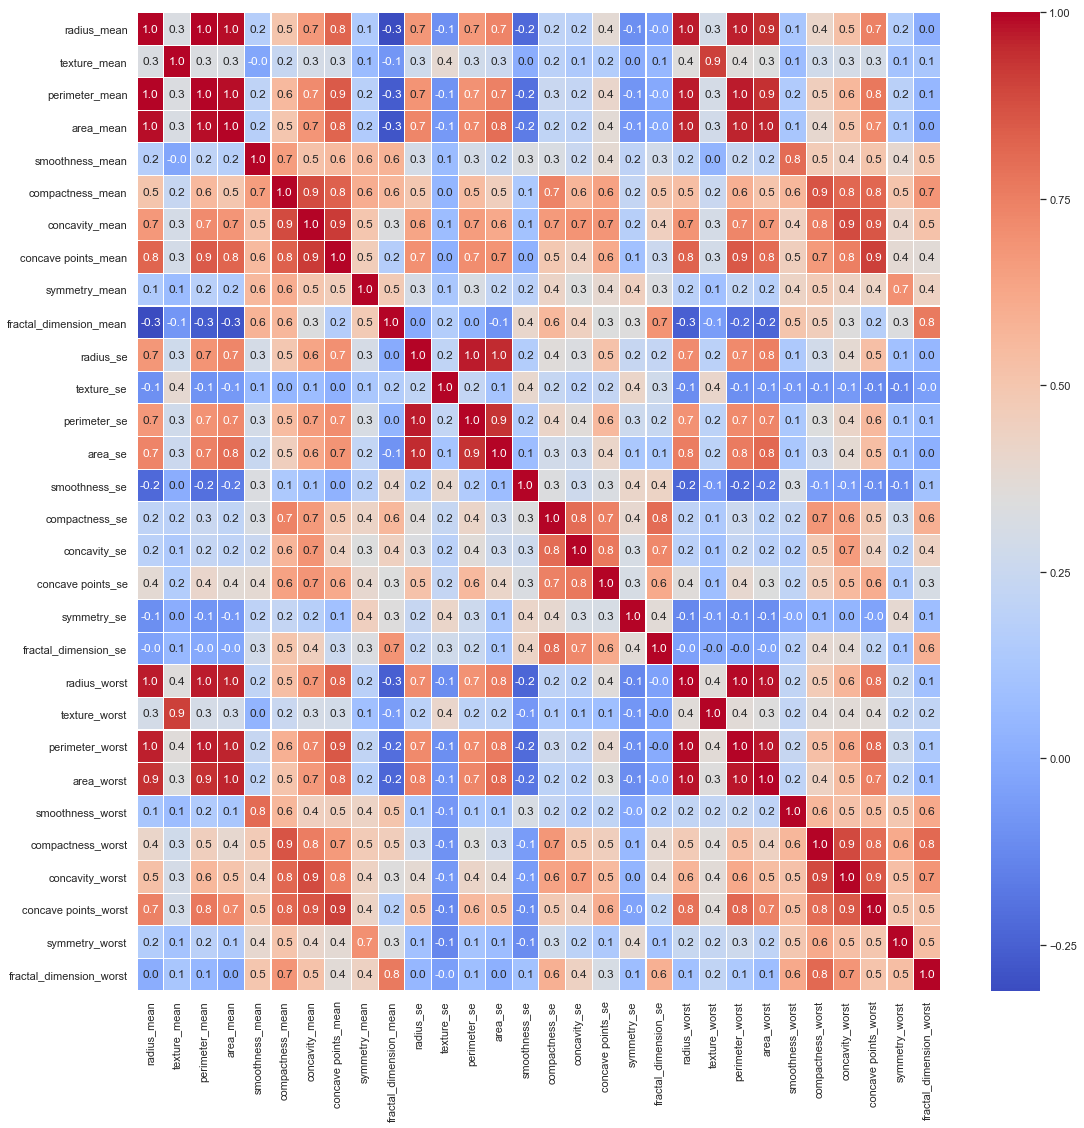

In [29]:
#correlation map
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)

diagnostico=data.diagnosis
data= data.drop(['Unnamed: 32', 'diagnosis'], axis=1)

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.10, fmt= '.1f',cmap= 'coolwarm', ax=ax)

En base al análisis hecho hasta ahora, las variables que más explican y que menos correlación tienen son:

radius_mean, concave points_worst, texture_mean, smoothness_mean y symmetry_mean. Como hemos visto anteriormente, la variable concave points_worst es muy útil a nivel de clasificación ya que toma valores muy diferentes entre Maligno y Benigno. Además, esta variable no tiene una correlación fuerte con el resto de variables que hemos elegido.

Podemos ver la correlación de las variables elegidas en este mapa de calor

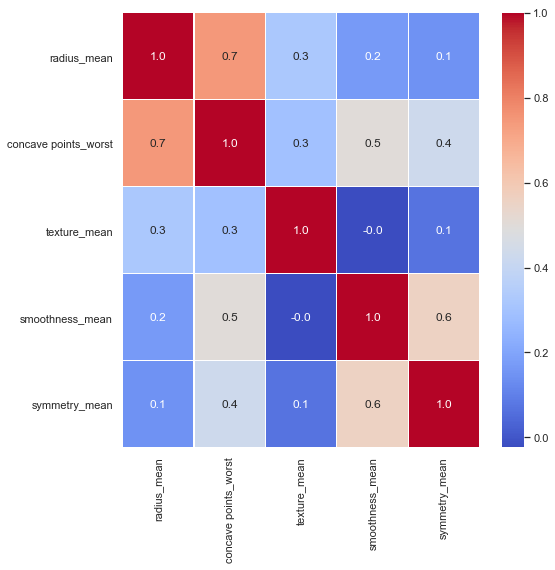

In [30]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0,index_col=0, parse_dates=True)


PosiblesVariables = data[['diagnosis','radius_mean','concave points_worst', 'texture_mean', 'smoothness_mean', 'symmetry_mean']]

diagnostico=PosiblesVariables.diagnosis
data= PosiblesVariables.drop(['diagnosis'], axis=1)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.10, fmt= '.1f',cmap= 'coolwarm', ax=ax)

### Prepare data

#### Procedemos a la realización Data Cleaning

In [31]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_3_Data Mining\\Práctica 2\\Entregable\\"
label='breastcancer'
data  = pd.read_csv(data_path+label+'.csv', skiprows=0, parse_dates=True)


print('Total dataframe size:')
print(data.shape)
data.duplicated().value_counts()

Total dataframe size:
(569, 33)


False    569
dtype: int64

No hay valores duplicados

In [32]:
## Chequeamos los valores nulos en cada una de las variables y vemos que no hay valores nulos

data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Look for inconsistencies: 

Como posible inconsistencia podemos ver si alguna variable worst es menor que la media.
Como vemos en el resultado, no se da ninguna incosistencia de este tipo

In [33]:
Inconsistencia_Radio = data['radius_mean']>data['radius_worst']
Inconsistencia_Texture=data['texture_mean']>data['texture_worst']
Inconsistencia_Perimeter=data['perimeter_mean']>data['perimeter_worst']
Inconsistencia_area=data['area_mean']>data['area_worst']
Inconsistencia_smoothness=data['smoothness_mean']>data['smoothness_worst']
Inconsistencia_compactness=data['compactness_mean']>data['compactness_worst']
Inconsistencia_concavity=data['concavity_mean']>data['concavity_worst']
Inconsistencia_concavepoints=data['concave points_mean']>data['concave points_worst']
Inconsistencia_symmetry=data['symmetry_mean']>data['symmetry_worst']
Inconsistencia_fractal=data['fractal_dimension_mean']>data['fractal_dimension_worst']


Inconsistencia_Radio=[print ('El número de inconsistencias del radio es ' + str(np.sum(Inconsistencia_Radio)))]
Inconsistencia_Texture=[print ('El número de inconsistencias de texture es ' + str(np.sum(Inconsistencia_Texture)))]
Inconsistencia_Perimeter=[print ('El número de inconsistencias de perimeter es ' + str(np.sum(Inconsistencia_Perimeter)))]
Inconsistencia_area=[print ('El número de inconsistencias de area es ' + str(np.sum(Inconsistencia_area)))]
Inconsistencia_smoothness=[print ('El número de inconsistencias de smoothness es ' + str(np.sum(Inconsistencia_smoothness)))]
Inconsistencia_compactness=[print ('El número de inconsistencias de compactness es ' + str(np.sum(Inconsistencia_compactness)))]
Inconsistencia_concavity=[print ('El número de inconsistencias de concavity es ' + str(np.sum(Inconsistencia_concavity)))]
Inconsistencia_concavepoints=[print ('El número de inconsistencias de concavepoints es ' + str(np.sum(Inconsistencia_concavepoints)))]
Inconsistencia_symmetry=[print ('El número de inconsistencias de symmetry es ' + str(np.sum(Inconsistencia_symmetry)))]
Inconsistencia_fractal=[print ('El número de inconsistencias de fractal es ' + str(np.sum(Inconsistencia_fractal)))]



El número de inconsistencias del radio es 0
El número de inconsistencias de texture es 0
El número de inconsistencias de perimeter es 0
El número de inconsistencias de area es 0
El número de inconsistencias de smoothness es 0
El número de inconsistencias de compactness es 0
El número de inconsistencias de concavity es 0
El número de inconsistencias de concavepoints es 0
El número de inconsistencias de symmetry es 0
El número de inconsistencias de fractal es 0


No se han encontrado inconsistencias

No se estudian los outliers de este dataset ya que, al tratarse de una enfermedad, los outliers pueden indicar diagnóstico maligno y no tienen por qué ser datos erróneos

### Feature Selection

Procedemos a realizar comprobaciones en las variables para su posible selección.

In [34]:
fs = FeatureSelector(data = data, labels = data.columns)

A continuación estudiamos qué variable tiene más de un 10% de missings y la eliminamos posteriormente. 
La variable con más de un 10% de missings es la variable Unnamed: 32 y es eliminada porque no aporta información al análisis

In [35]:
fs.identify_missing(missing_threshold=0.1)

1 features with greater than 0.10 missing values.



In [36]:
fs.missing_stats.head()

,missing_fraction
Unnamed: 32,1.0
compactness_se,0.0
fractal_dimension_worst,0.0
symmetry_worst,0.0
concave points_worst,0.0


Procedemos a la eliminación de la variable Unnamed: 32, ya que no aporta información al análisis y también de la variable id
ya que no es necesaria en nuestro análisis tampoco

In [37]:
data=data.drop(['Unnamed: 32'], axis=1)   ### Todas las filas son missings
data=data.drop(['id'], axis=1)   ### No aporta nada en nuestro análisis

Estudiamos la correlación superior al 70% de las variables. Abajo aparece la correlación entre cada una de las variables. Es otro método diferente al mapa de calor visto anteriormente. El mapa de calor es mucho más visual.

Se estudia la correlación ya que a la hora de modelar se deben evitar variables correlacionadas.

In [38]:
fs.identify_collinear(correlation_threshold=0.7)

20 features with a correlation magnitude greater than 0.70.



A continuación vemos la correlación entre cada una de las variables. Nos quedaremos con las variables concave points_worst, texture_mean, smoothness_mean, symmetry_mean y radius_mean como variables explicativas (se puede ver abajo en la parte de modelización)

He elegido las que menor correlación tienen entre sí y las que más información aportan al modelo según los histogramas vistos anteriormente.

In [39]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)


,drop_feature,corr_feature,corr_value
0,perimeter_mean,radius_mean,0.997855
40,perimeter_worst,radius_worst,0.993708
1,area_mean,radius_mean,0.987357
2,area_mean,perimeter_mean,0.986507
48,area_worst,radius_worst,0.984015
49,area_worst,perimeter_worst,0.977578
13,perimeter_se,radius_se,0.972794
33,perimeter_worst,perimeter_mean,0.970387
25,radius_worst,radius_mean,0.969539
26,radius_worst,perimeter_mean,0.969476


### Data Transforms

In [40]:
## Reemplazamos, en la variable diagnosis, la M por el 1 y la B por el 0. De tal manera que el 1 indica Diagnóstico Maligno

data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

En nuestro caso no es necesario añadir variables nuevas, ya que tenemos multitud de variables en nuestro dataset, muchas de ellas correlacionadas entre ellas. Tenemos suficientes variables para poder hacer un buen análisis

## Evaluate Algorithms

### Split-out validation dataset

He tomado como variables explicativas las que menos correlación tenían entre sí y a la vez mayor información aportaban para realizar la clasificación entre Benigno y Maligno (como ya mencionamos anteriormente, la variable concave points_worst, según los histogramas vistos antes, separa bastante bien la muestra entre Benigno y Maligno por lo que aporta bastante en el modelo)

In [41]:
X = data[['radius_mean','concave points_worst','texture_mean', 'smoothness_mean', 'symmetry_mean']].values
y = data['diagnosis'].values

Separamos nuestro dataset en dos conjuntos de datos. Damos el 80% de registros para entrenar y el resto para test.

In [42]:
# Spliting data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Realizamos el escalado ya que ayudará a que el modelo sea más preciso, las variables deben estar en la misma escala.

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Escalamos con los datos de train
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Pongo semilla en los algoritmos para que al volver a ejecutar salgan los mismos resultados y así pueda realizar comentarios sobre ellos, ya que si no la pongo, los resultados varían y no podría comentar pues cambiaría el resultado cada vez.

Probamos como primer modelo la regresión logística.

In [44]:
logreg=LogisticRegression(solver='lbfgs', random_state=42)

logreg.fit(XtrainScaled,y_train)
y_pred=logreg.predict(XtestScaled)
print (classification_report(y_test, y_pred))
acc_LR = accuracy_score(y_test, y_pred)
print('Accuracy de la Regresión Logística:', acc_LR)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy de la Regresión Logística: 0.9824561403508771


Dibujamos la matriz de confusión:

In [45]:
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,71,0
1,2,41


Probamos con el algoritmo de KNN

In [46]:
knn=KNeighborsClassifier()

knn.fit(XtrainScaled,y_train)
y_pred=knn.predict(XtestScaled)
print (classification_report(y_test, y_pred))
acc_KNN = accuracy_score(y_test, y_pred)
print('Accuracy del KNN:', acc_KNN)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy del KNN: 0.956140350877193


In [47]:
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,70,1
1,4,39


Probamos con el algoritmo SVC

In [48]:
svc=SVC(gamma='scale', random_state=42)

svc.fit(XtrainScaled,y_train)
y_pred=svc.predict(XtestScaled)
print (classification_report(y_test, y_pred))
acc_SVC = accuracy_score(y_test, y_pred)
print('Accuracy del SVC:', acc_SVC)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy del SVC: 0.9824561403508771


In [49]:
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,71,0
1,2,41


Probamos con el algoritmo de Árbol de Decisión

In [50]:
dt=DecisionTreeClassifier(random_state=42)

dt.fit(XtrainScaled,y_train)
y_pred=dt.predict(XtestScaled)
print (classification_report(y_test, y_pred))
acc_DT = accuracy_score(y_test, y_pred)
print('Accuracy del DT:', acc_DT)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.86      0.88      0.87        43

   micro avg       0.90      0.90      0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

Accuracy del DT: 0.9035087719298246


In [51]:
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,65,6
1,5,38


Probamos con el algoritmo de Random Forest

In [52]:
rf=RandomForestClassifier(random_state=42)

rf.fit(XtrainScaled,y_train)
y_pred=rf.predict(XtestScaled)
print (classification_report(y_test, y_pred))
acc_RF = accuracy_score(y_test, y_pred)
print('Accuracy del RF:', acc_RF)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy del RF: 0.9473684210526315


C:\Users\mixcr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [53]:
pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,69,2
1,4,39


In [54]:
acc = pd.DataFrame({'LR': acc_LR*100,'KNN': acc_KNN*100,'SVC': acc_SVC*100, 'DT': acc_DT*100,'RF': acc_RF*100},index=[0])
acc



,LR,KNN,SVC,DT,RF
0,98.245614,95.614035,98.245614,90.350877,94.736842


## 5. Improve Accuracy <a class="anchor" id="5-bullet"></a>

### a) Algorithm Tuning: Optimización de algunos algoritmos con parámetro libre

Usamos GridSearch para la búsqueda del mejor hiperpárametro.

He comentado alguna de las variables de GridSearch por el tiempo de computación que toma. Podríamos haberlas añadido para intentar mejorar todavía más el algoritmo. De esta forma, nos da que el número óptimo de estimadores es 10, que max_features es 2 y que min_samples_split es 8

In [55]:
param_grid = {#'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
              'max_features': [2, 3, 4, 5],
              #'min_samples_leaf': [2, 3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [10, 20, 30, 60, 70, 80, 100, 200, 300, 1000]}
#Create a basic model
rf = RandomForestClassifier(random_state=42)
#Grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0)
rf_cv.fit(XtrainScaled, y_train)
print(rf_cv.best_params_)
score=rf_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10}
Accuracy: 95.16%


In [56]:
t = time.time()
rf2=RandomForestClassifier(n_estimators=10, max_features=2, min_samples_split=8, random_state=42)  ## metemos los hiperparámetros calculados con GridSearch
rf2.fit(XtrainScaled,y_train)
y_pred=rf2.predict(XtestScaled)
elapsed_RF = time.time() - t
print('Time elapsed: ', elapsed_RF)

print (classification_report(y_test, y_pred))
acc_RF2 = accuracy_score(y_test, y_pred)
print('Accuracy del RF:', acc_RF2)


Time elapsed:  0.02194356918334961
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy del RF: 0.956140350877193


In [57]:
knn=KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0)
knn_cv.fit( XtrainScaled, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 31}


In [58]:
t = time.time()
knn2=KNeighborsClassifier(n_neighbors= 31)   ## Subimos el número de neighbors para mejorar el modelo, tal cual nos dice GridSearch

knn2.fit(XtrainScaled,y_train)
y_pred=knn2.predict(XtestScaled)
elapsed_KNN = time.time() - t
print('Time elapsed: ', elapsed_KNN)
print (classification_report(y_test, y_pred))
acc_KNN2 = accuracy_score(y_test, y_pred)
print('Accuracy del KNN:', acc_KNN2)

Time elapsed:  0.001994609832763672
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy del KNN: 0.9736842105263158


In [59]:
param_grid = {'max_depth': [5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [2,4,6,8, 10, 12],
              'max_features': [2, 3]}
# Create a basic model
tree = DecisionTreeClassifier(random_state=42)
# Grid search model
tree_cv = GridSearchCV(estimator = tree, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0)
tree_cv.fit(XtrainScaled, y_train)
print(tree_cv.best_params_)
score=tree_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

{'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12}
Accuracy: 93.41%


In [60]:
t = time.time()
dt2 = DecisionTreeClassifier(criterion='entropy', max_features=3, max_depth=5, min_samples_leaf=5, min_samples_split=12, random_state=42)
dt2.fit(XtrainScaled,y_train)

y_pred=dt2.predict(XtestScaled)
elapsed_DT = time.time() - t
print('Time elapsed: ', elapsed_DT)
print (classification_report(y_test, y_pred))
acc_dt2 = accuracy_score(y_test, y_pred)
print('Accuracy del DT:', acc_dt2)


Time elapsed:  0.0019953250885009766
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

   micro avg       0.95      0.95      0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy del DT: 0.9473684210526315


In [61]:
svc=SVC(gamma='scale', random_state=42)
param_grid = {"C": [1,2,3,5,10], 'degree':[1,3,5,10]}
svc_cv=GridSearchCV(svc,param_grid=param_grid,cv = 10, n_jobs = -1, verbose = 0)
svc_cv.fit(XtrainScaled, y_train)
svc_cv.best_params_

{'C': 1, 'degree': 1}

In [62]:
t = time.time()
svc_cv2= SVC(C=1, degree=1, gamma='scale', random_state=42)


svc_cv2.fit(XtrainScaled,y_train)
y_pred=svc_cv2.predict(XtestScaled)
elapsed_SVC = time.time() - t
print('Time elapsed: ', elapsed_SVC)
print (classification_report(y_test, y_pred))
acc_svc_cv2 = accuracy_score(y_test, y_pred)
print('Accuracy del SVC_CV:', acc_svc_cv2)


Time elapsed:  0.003990888595581055
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy del SVC_CV: 0.9824561403508771


Hemos mejorado los algoritmos KNN, DT y RF. El que tiene mejor accuracy es el SVC, que no se ha podido mejorar.

El algoritmo más lento de los mejorados es el Random Forest.

In [63]:
acc = pd.DataFrame({'SVC': acc_SVC*100, 'SVC2': acc_svc_cv2*100,'KNN': acc_KNN*100, 'KNN2': acc_KNN2*100, 'DT': acc_DT*100, 'DT2': acc_dt2*100, 'RF': acc_RF*100, 'RF2': acc_RF2*100},index=[0])
acc

,SVC,SVC2,KNN,KNN2,DT,DT2,RF,RF2
0,98.245614,98.245614,95.614035,97.368421,90.350877,94.736842,94.736842,95.614035


In [64]:
tiempos = pd.DataFrame({'SVC2': elapsed_SVC, 'KNN2': elapsed_KNN, 'DT2': elapsed_DT, 'RF2': elapsed_RF},index=[0])
tiempos

,SVC2,KNN2,DT2,RF2
0,0.003991,0.001995,0.001995,0.021944


Podemos intentar mejorar todavía más haciendo un ensemble, es decir, crear un modelo a partir de los mejores modelos ya creados anteriormente. Como vemos, no conseguimos mejorarlo y el resultado de accuracy es el mismo que usando el SVC

In [65]:
logreg=LogisticRegression(solver='lbfgs', random_state=42)
knn2=KNeighborsClassifier(n_neighbors= 31)
svc_cv2= SVC(C=1, degree=1, gamma='scale', random_state=42)
dt2 = DecisionTreeClassifier(criterion='entropy', max_features=3, max_depth=5, min_samples_leaf=5, min_samples_split=12, random_state=42)
rf2=RandomForestClassifier(n_estimators=10, max_features=2, min_samples_split=8, random_state=42)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('logreg',logreg),('knn2', knn2), ('svc_cv2', svc_cv2), ('dt2',dt2), ('rf2', rf2)], voting='hard')

voting_clf.fit(XtrainScaled,y_train)

y_pred=voting_clf.predict(XtestScaled)
print (classification_report(y_test, y_pred))
acc_voting_clf = accuracy_score(y_test, y_pred)
print('Accuracy del Voting_clf:', acc_voting_clf)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy del Voting_clf: 0.9824561403508771
